# End to End multi class dog Breed Classification
 This notebook builds an end to end multi class image classifier using Tensorflow 2.0 and Tensor Flow hub.

 ## 1. Problem

 ## 2. Dataset
 The data we're using is from "https://www.kaggle.com/c/dog-breed-identification/data"

## 3. Evaluation
The evaluation is a file with prediction probabilities for each dog breed of each test image.

## 4. Features
Some information about the Data
* We are dealing with images (unstructured Data) so it's probably best we use deep learning/ transfer learning.
* There are 120 breeds of dogs (meaning 120 different classes) .
* There are 10k+ images in training
(these images have labels) and testing set (these images have no labels, because we will want to predict them)


In [1]:
import tensorflow as tf
print("TF version:",tf.__version__)
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

TF version: 2.10.0
GPU not available:


In [2]:
import tensorflow_hub as hub
print("Hub version:",hub.__version__)
# Check for GPU availability
print("GPU","Available(yesss!!!!)" if tf.config.list_physical_devices("GPU") else "not available:")

Hub version: 0.8.0
GPU not available:


### Works only in in colab

In [4]:
# iMPORT tensor flow 2.0x
# try:
#   %tensorflow_version 2.x
# except:
#   pass

## Getting data into tensors

In [3]:
!pip install pandas
import pandas as pd

   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.6 MB 660.6 kB/s eta 0:00:18
   ---------------------------------------- 0.1/11.6 MB 1.4 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.6 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/11.6 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.8/11.6 MB 3.9 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 3.8 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 3.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.1/11.6 MB 3.7 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/11.6 MB 4.3 MB/s eta 0:00:03
   ------ --------------------------------- 2.0/11.6 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 2.3/11.6 MB 4.4 MB/s eta 0:00:03
   -------- ------------------------------- 2.5/11.6 MB 4.4 MB/s eta 0:00:03
   -

C:\Users\umang\AppData\Local\Temp\ipykernel_23900\3144141588.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [10]:
!pip install matplotlib
import matplotlib.pyplot as plt

     ---------------------------------------- 0.0/162.2 kB ? eta -:--:--
     -- ------------------------------------- 10.2/162.2 kB ? eta -:--:--
     -------------- ---------------------- 61.4/162.2 kB 812.7 kB/s eta 0:00:01
     -------------------------------------- 162.2/162.2 kB 1.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.6 MB ? eta -:--:--
    --------------------------------------- 0.2/7.6 MB 3.1 MB/s eta 0:00:03
   -- ------------------------------------- 0.4/7.6 MB 4.4 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.6 MB 5.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.0/7.6 MB 5.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.6 MB 5.8 MB/s eta 0:00:02
   -------- ------------------------------- 1.7/7.6 MB 6.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.0/7.6 MB 6.0 MB/s eta 0:00:01
   ---------- ----------------------------- 2.1/7.6 MB 6.1 MB/s eta 0:00:01
   ------------ 

In [5]:
labels_csv=pd.read_csv("Dog_Vision/labels.csv");
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [6]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [8]:
# How much image are there for each brees
labels_csv["breed"].value_counts()

breed
scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: count, Length: 120, dtype: int64

<Axes: xlabel='breed'>

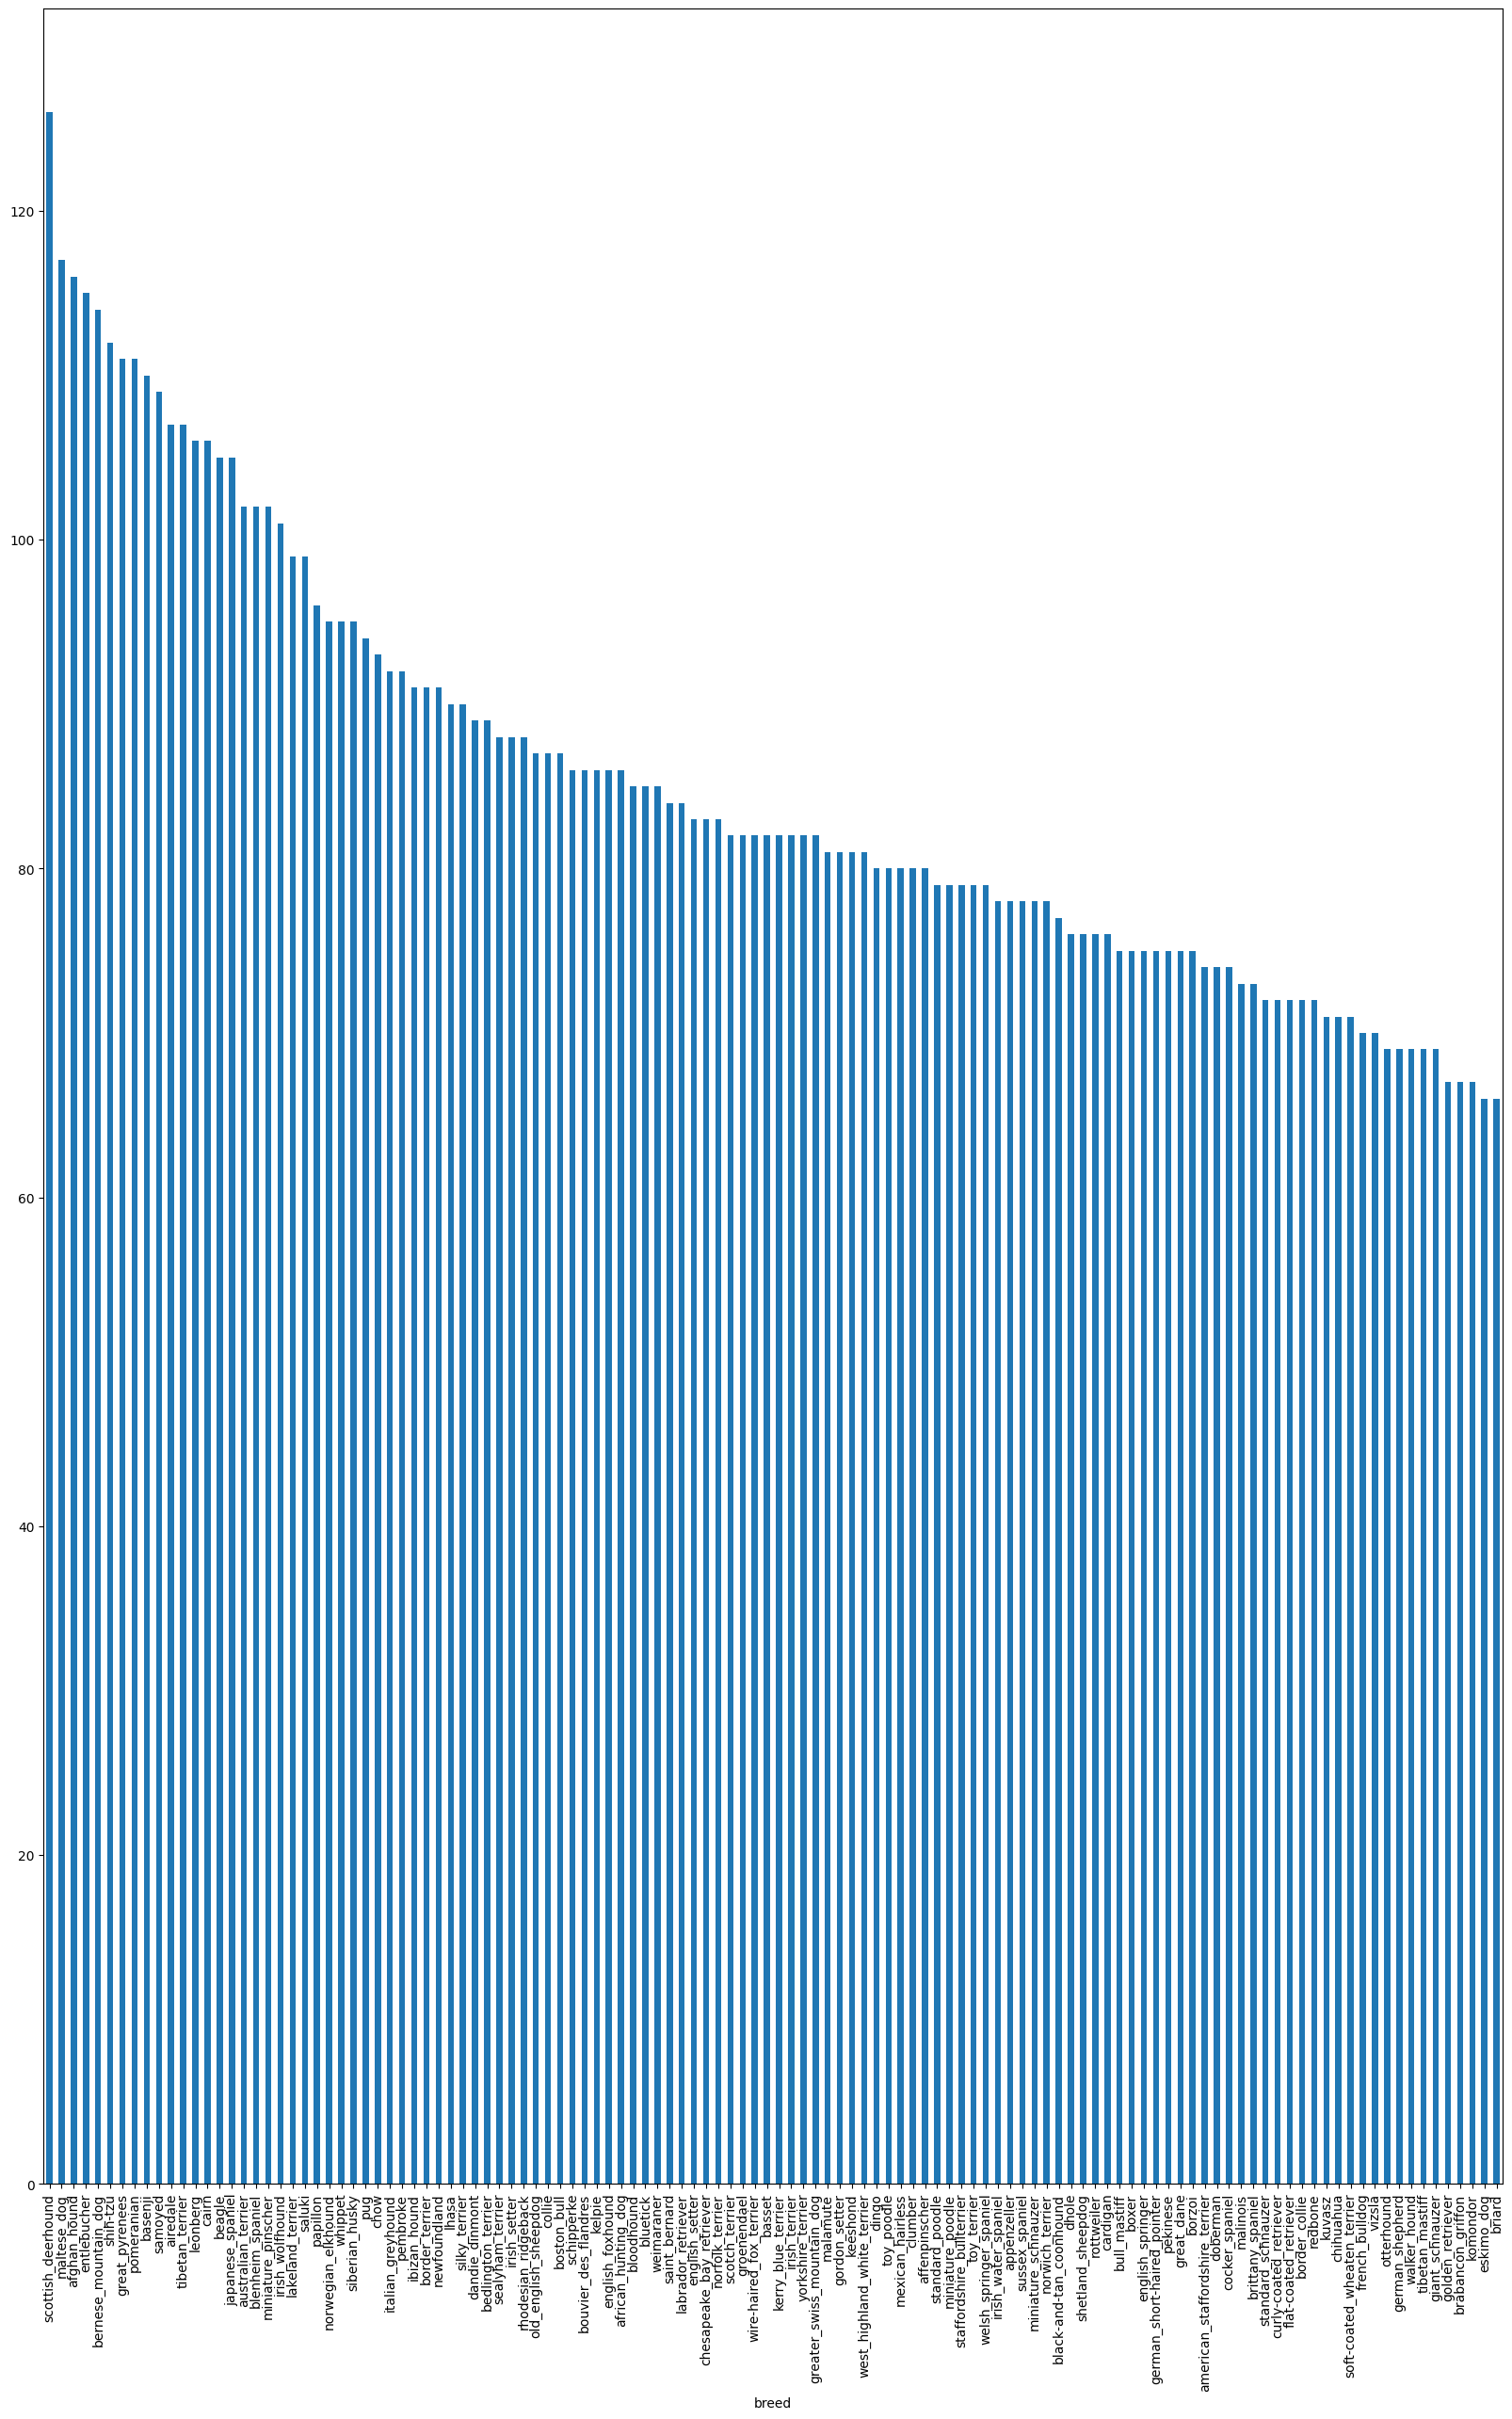

In [11]:
labels_csv["breed"].value_counts().plot.bar(figsize=(20,30))

In [12]:
# Viewing an image
!pip install IPython
from IPython.display import Image

In [18]:
import os
cwd = os.getcwd()
print(cwd)

D:\Conda_Pro_\TensorFLow


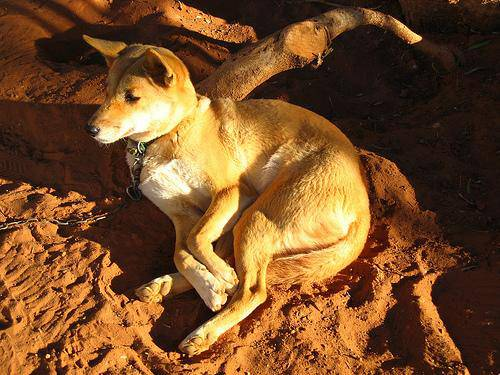

In [22]:
Image("Dog_Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## Getting images and their labels

In [23]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [27]:
#creating pathnames from Image ID's
filename=[fname for fname in labels_csv["id"]]
filename[:10]

['000bec180eb18c7604dcecc8fe0dba07',
 '001513dfcb2ffafc82cccf4d8bbaba97',
 '001cdf01b096e06d78e9e5112d419397',
 '00214f311d5d2247d5dfe4fe24b2303d',
 '0021f9ceb3235effd7fcde7f7538ed62',
 '002211c81b498ef88e1b40b9abf84e1d',
 '00290d3e1fdd27226ba27a8ce248ce85',
 '002a283a315af96eaea0e28e7163b21b',
 '003df8b8a8b05244b1d920bb6cf451f9',
 '0042188c895a2f14ef64a918ed9c7b64']

In [28]:
# Checking whether number of filename matches number of actual image files
if len(os.listdir("Dog_Vision/train/"))== len(filename):
    print("FIlename match the actual amount of files!!! Proceed.")
else:
    print("FIlenames do not match the actual amount of files, check the target directory.")

FIlename match the actual amount of files!!! Proceed.
